# K-Means Clustering
> Debatreya Das <br>
> Roll No. 12212070 <br>
> CS A4 <br>
> ML Lab 12

## Importing Libraries and Loading Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
df = pd.read_csv("Mall_Customers.csv")

# Display the first few rows
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Preprocess Data

In [3]:
# Select features for clustering (e.g., Annual Income and Spending Score)
data = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

# Normalize the data
# Using the mean and standard deviation (z-score normalization)
data = (data - data.mean(axis=0)) / data.std(axis=0)

## Step 1: Initialize the Centroid

In [4]:
np.random.seed(0)
k = 3  # Number of clusters
centroids = data[np.random.choice(data.shape[0], k, replace=False)]
print("Initial centroids:\n", centroids)

Initial centroids:
 [[-1.43364376 -0.82301709]
 [ 1.00919971 -1.44416206]
 [ 0.09313341 -0.16305055]]


## Step2: Define Distance and Assign Cluster

In [5]:
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

def assign_clusters(data, centroids):
    clusters = []
    for point in data:
        distances = [euclidean_distance(point, centroid) for centroid in centroids]
        cluster = np.argmin(distances)
        clusters.append(cluster)
    return np.array(clusters)

## Step 3: Update Centroid

In [6]:
def update_centroids(data, clusters, k):
    new_centroids = []
    for i in range(k):
        points_in_cluster = data[clusters == i]
        new_centroid = points_in_cluster.mean(axis=0)
        new_centroids.append(new_centroid)
    return np.array(new_centroids)

## Define K-Means

In [7]:
def k_means(data, k, max_iters=100, tol=1e-4):
    # Initialize centroids
    centroids = data[np.random.choice(data.shape[0], k, replace=False)]
    
    for i in range(max_iters):
        # Assign clusters
        clusters = assign_clusters(data, centroids)
        
        # Update centroids
        new_centroids = update_centroids(data, clusters, k)
        
        # Check for convergence
        if np.all(np.abs(new_centroids - centroids) < tol):
            break
        centroids = new_centroids
    
    return centroids, clusters

## Execute K Means and Visualize Result

Final centroids:
 [[ 1.00919971 -1.22553537]
 [-0.62618966 -0.01439238]
 [ 0.99158305  1.23950275]]
Cluster assignments for each point: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


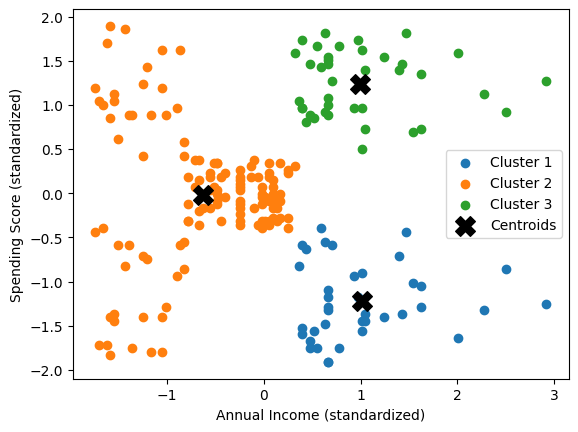

In [8]:
centroids, clusters = k_means(data, k)

print("Final centroids:\n", centroids)
print("Cluster assignments for each point:", clusters)

# Plot the data points and centroids
for i in range(k):
    points = data[clusters == i]
    plt.scatter(points[:, 0], points[:, 1], label=f'Cluster {i + 1}')
    
# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='black', marker='X', label='Centroids')
plt.xlabel('Annual Income (standardized)')
plt.ylabel('Spending Score (standardized)')
plt.legend()
plt.show()

## Predict Cluster

In [9]:
def predict_cluster(test_data, centroids):
    predictions = []
    for point in test_data:
        distances = [euclidean_distance(point, centroid) for centroid in centroids]
        cluster = np.argmin(distances)
        predictions.append(cluster)
    return np.array(predictions)


## Testing on Test Data

In [10]:
# Create synthetic test data
test_data = np.array([
    [60, 30],  # Mid-range income and spending
    [15, 85],  # Low income, high spending
    [95, 15],  # High income, low spending
    [50, 50],  # Average income and spending
    [85, 75],  # High income and high spending
])

# Standardize test data using the same mean and std as training data
test_data = (test_data - df[['Annual Income (k$)', 'Spending Score (1-100)']].mean().values) / df[['Annual Income (k$)', 'Spending Score (1-100)']].std().values

# Predict the clusters for test data
test_clusters = predict_cluster(test_data, centroids)

print("Test data cluster assignments:", test_clusters)

Test data cluster assignments: [1 1 0 1 2]


## Visualize the Result

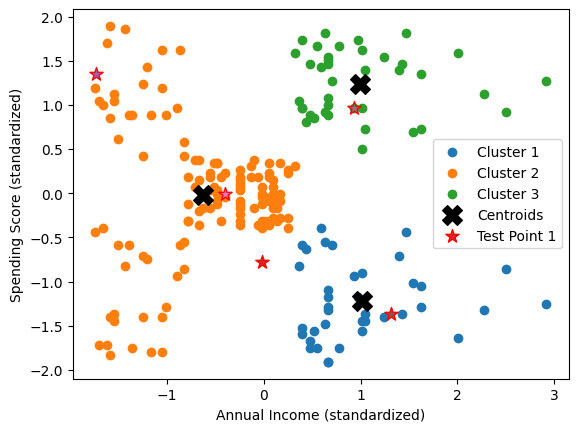

In [11]:
# Plot training data clusters
for i in range(k):
    points = data[clusters == i]
    plt.scatter(points[:, 0], points[:, 1], label=f'Cluster {i + 1}')

# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='black', marker='X', label='Centroids')

# Plot test data points
for i, point in enumerate(test_data):
    plt.scatter(point[0], point[1], s=100, marker='*', edgecolor='red', label=f'Test Point {i+1}' if i == 0 else "")  # Only label the first test point

plt.xlabel('Annual Income (standardized)')
plt.ylabel('Spending Score (standardized)')
plt.legend()
plt.show()